# Principal Component Analysis of Iris data for Data Visualisation

In [1]:
# Example taken from https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA and
# https://www.kaggle.com/bburns/iris-exploration-pca-k-means-and-gmm-clustering

# Import the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# Load the Iris dataset from a public database
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Load the data into dataframe
df = pd.read_csv(url
                 , names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Visualisation of data

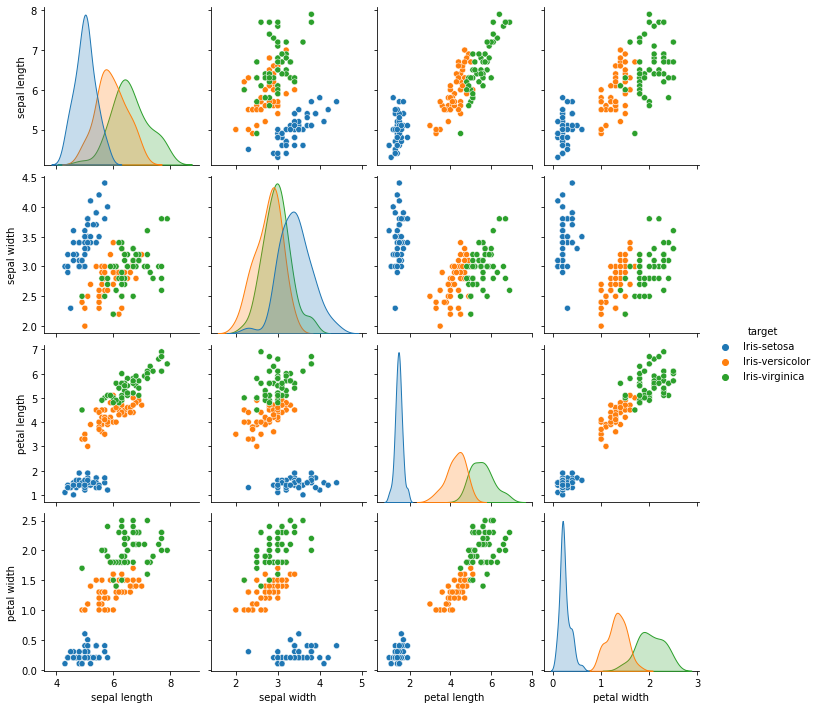

In [3]:
import seaborn as sns 
sns.pairplot(data = df, hue="target")

# Standardise the data before doing PCA

PCA when applied on a multivariate feature space with p correlated variables, the resultant vector will be a set of p principal components (z1, z2,..., zp) with zero correlation. The Principal Components (PCs) are successively calculated by computing the eigenvalues and eigenvectors based on the variance-covariance matrix of the original data. It makes sense to standardize the data, especially, if the variables were measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [4]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values
print(x, y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [5]:
# Standardise the x features
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


# PCA 

In [6]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [7]:
df[['target']].head()

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [8]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


# Visualise the first two principal components: 2-Dimesional

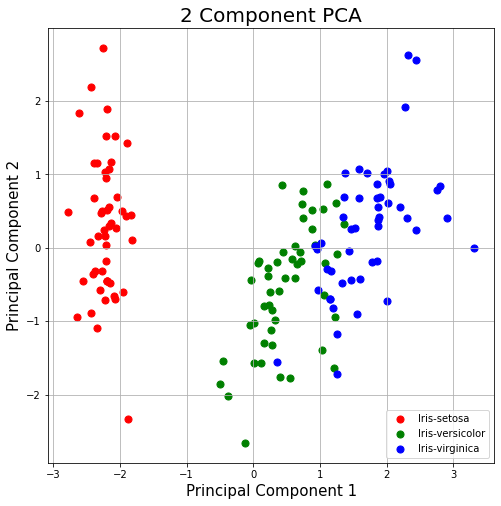

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Setosa category seems to be well separated from the other two, while versicolor and virginica have some datapoints overlapping each other

# How to calculate the variance explained by the principal components?

In [10]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

<AxesSubplot:xlabel='PC'>

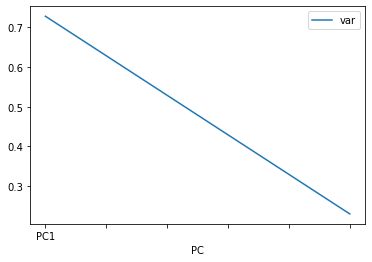

In [11]:
# Scree plot
pcdf = pd.DataFrame({'var':pca.explained_variance_ratio_, 'PC':['PC1','PC2']})
pcdf.plot(y = "var", x = "PC")

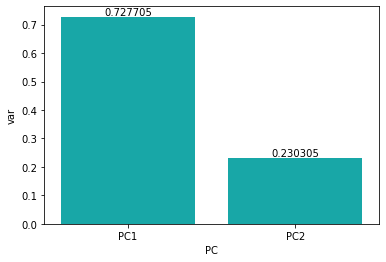

In [14]:
import seaborn as sns
ax = sns.barplot(x='PC', y="var", data=pcdf, color="c");
for i in ax.containers:
    ax.bar_label(i,)

# Feature Importance

Eigenvectors obtained from the PCA for the four-variable space

In [15]:
print(abs(pca.components_))

[[0.52237162 0.26335492 0.58125401 0.56561105]
 [0.37231836 0.92555649 0.02109478 0.06541577]]


The eigenvalues show the contribution of the four variables to each of the principal components. The magnitude represents how significant is the contribution of a variable to each principal component. If there are negative values, that represents a negative correlation between the variable and that particuar principal component. In the current case of iris dataset, we dont have any negative eigenvalues.

Sepal length, petal length and petal width has contributed most of the variance explained by PC1
Sepal width has contributed most of the variance explained by PC2

Therefore, if we consider PC1 axis as the most important giving the best separation between the 3 categories, then Sepal length, petal length and petal width would be the most important variables.

# 3D Visualisation

In [16]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head(5)

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)


,principal component 1,principal component 2,principal component 3,target
0,-2.264542,0.505704,-0.121943,Iris-setosa
1,-2.086426,-0.655405,-0.227251,Iris-setosa
2,-2.367950,-0.318477,0.051480,Iris-setosa
3,-2.304197,-0.575368,0.098860,Iris-setosa
4,-2.388777,0.674767,0.021428,Iris-setosa


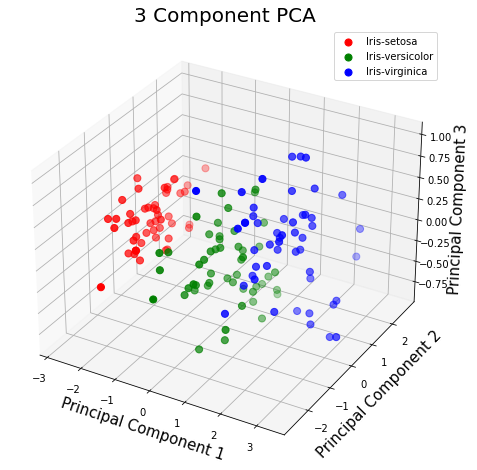

In [17]:
# Visualise
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 Component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Inference from 3D plot:
The 3D plot does not represent a good separation between the 3 categories. It would have been better if we could rotate the plot and vise from different angles.

In [18]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832])

From the above explained variance array, it is clear that PC1 and PC2 together explains a cumulative variance of 95%, and the third principal component, PC3 explains only 3%. Therefore, we could finalise that PC1 and PC2 are sufficient to separate the 3 categories of the iris dataset.

# k Means Clustering using Iris data

In [19]:
# We already know that there are 3 species in the iris dataset, so let's set the number of clusters = 3 and see
# if the predictions for each data point matches the label in y.

from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0 # seed is set to reproduce the prediction output/results

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(x)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(x)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# We will first perform 2-dimensional PCA and then plot the predicted k-means on the Principal components
example taken from https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA

In [20]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


# k-means clustering
# Lets imagine that we dont have labels for this data and we use predicted labels to see what it looks like

In [21]:
# first, convert species to an arbitrary number
df['target'] = df['target'].astype('category') 
y_array = df['target'].cat.codes

df_plot = principalDf.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans
df_plot['Species'] = y_array  # also add actual labels so we can use it in later plots
df_plot.head(10)

,principal component 1,principal component 2,ClusterKmeans,Species
0,-2.264542,0.505704,1,0
1,-2.086426,-0.655405,1,0
2,-2.367950,-0.318477,1,0
3,-2.304197,-0.575368,1,0
4,-2.388777,0.674767,1,0
5,-2.070537,1.518549,1,0
6,-2.445711,0.074563,1,0
7,-2.233842,0.247614,1,0
8,-2.341958,-1.095146,1,0
9,-2.188676,-0.448629,1,0


In [22]:
# so now we can make a 2d scatterplot of the clusters
# first define a plot fn

def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'principal component 1', y = 'principal component 2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");

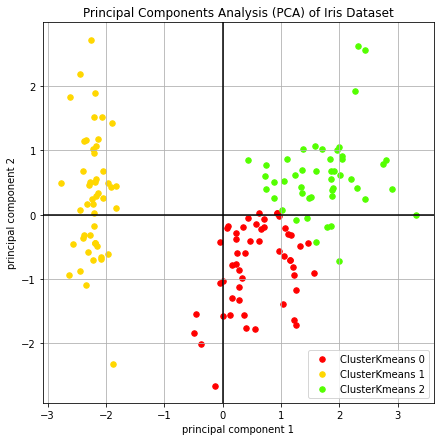

In [23]:
# plot the clusters each datapoint was assigned to
import matplotlib as mpl
plotData(df_plot, 'ClusterKmeans')

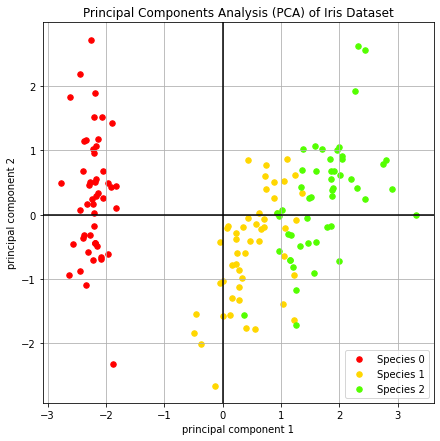

In [24]:
# so those are the *predicted* labels - what about the *actual* labels?
plotData(df_plot, 'Species')

# The k means did not find the actual clusters. We will try a different technique called Gaussian Mixture Model clustering next week

# https://www.kaggle.com/bburns/iris-exploration-pca-k-means-and-gmm-clustering

Gaussian Mixture Model clustering assumes normal/Gaussian distribution for all the given features. This is a probabilistic model that automatically learns the subpopulations from the given overall population of data points.

In [25]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(x)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(x)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

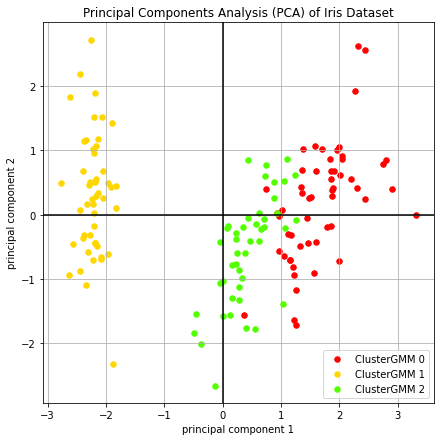

In [26]:
# add the GMM clusters to our data table and plot them
df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'ClusterGMM')

GMM has identified the correct clusters better than K means. We can use 'adjusted Rand score' to quantify the clustering efficiency of the models.

In [27]:
# see http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html
from sklearn.metrics.cluster import adjusted_rand_score

# let's see how the k-means clustering score - 
score = adjusted_rand_score(y_array, y_cluster_kmeans)
score

0.6201351808870379

In [28]:
# Check the clustering score for GMM
score = adjusted_rand_score(y_array, y_cluster_gmm)
score

0.9038742317748124

Add your Inference here!

# Excercise: Apply PCA to the Wine dataset learned in Data Preprocessing

Data: 'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv